In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
ctdc = pd.read_csv("/home/nizam/Desktop/CTDC/data.csv")
ctdc.drop(['Unnamed: 63',
       'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67',
       'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71',
       'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75'],axis=1,inplace=True)
ctdc.replace('-99','unknown',inplace=True)
ctdc.replace(-99,'unknown',inplace=True)
ctdc.shape

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,45,46,48,51,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(48801, 63)

In [3]:
ctdc.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,0,0,0,0,1


In [4]:
targets = ['isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval',
       'isSlaveryAndPractices']

### Zooming into data

In [6]:
from collections import Counter
for col in targets:
    print("*"*20,col,"*"*20)
    print(Counter(ctdc[col]))
    print("-"*200)

******************** isForcedLabour ********************
Counter({'unknown': 22203, '0': 11930, '1': 7528, 'False promises': 1274, 'Psychological abuse': 1030, 'Physical abuse': 905, 'Excessive working hours': 769, 'Restricts movement': 705, 'Psychoactive substances': 590, 'Threats': 421, 'Other': 418, 'Sexual abuse': 410, 'Physical Abuse': 195, 'Takes earnings': 146, 'Withholds necessities': 87, 'Withholds documents': 71, 'Restricts medical care': 48, 'Restricts financial access': 48, 'Uses children': 17, 'Threat of law enforcement': 5, 'Not specified': 1})
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
******************** isSexualExploit ********************
Counter({'unknown': 24464, '1': 11793, '0': 7393, 'Psychological abuse': 839, 'False promises': 821, 'Restricts movement': 632, 'Physical abuse': 539, 'Physical Abuse': 505, 'P

In [7]:
#from year 2009 to 2019(inclusive)
ctdc_9_19 = ctdc[ctdc['yearOfRegistration']>=2009]
ctdc_9_19.shape

(42098, 63)

/home/nizam/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0.5, 1.0, 'No of trafficking cases registered from 2009 to 2019')

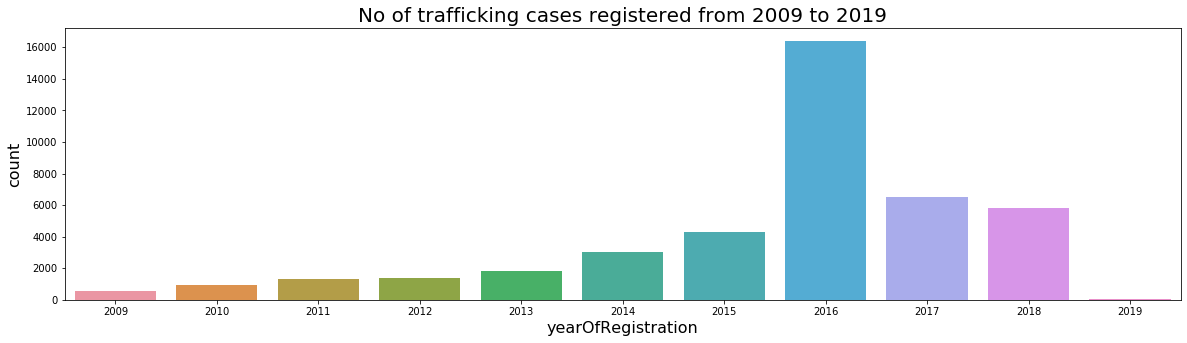

In [8]:
plt.figure(figsize=(20,5))
plt.xlabel('yearOfRegistration',size=16); plt.ylabel('count',size=16); 
sns.countplot(ctdc_9_19[ctdc_9_19['yearOfRegistration']!='unknown']['yearOfRegistration'])
plt.title('No of trafficking cases registered from 2009 to 2019',size=20)

**Observation**:There seem to be 2 trends in the number of cases registered, one from 2009 until 2016 and the other from 2016 until 2019.  
So, it makes sense to analyse data with an increasing trend, finding factors that made the trend behave in the way it does, and likewise for the decreasing trend from 2016 until 2019.

Text(0.5, 1.0, 'Age at the time exploitation(labour/sexual/organ) began.')

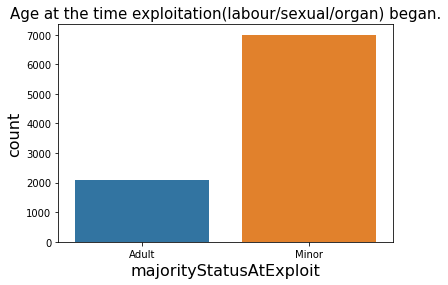

In [82]:
plt.xlabel('count',size=16); plt.ylabel('majorityStatusAtExploit',size=16); 
sns.countplot(ctdc_9_19[ctdc_9_19['majorityStatusAtExploit']!='unknown']['majorityStatusAtExploit'])
plt.title('Age at the time exploitation(labour/sexual/organ) began.',size=15)

Text(0.5, 1.0, 'Age at the time when case was registered')

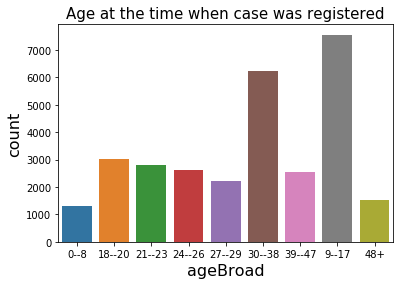

In [83]:
plt.xlabel('count',size=16); plt.ylabel('ageBroad',size=16); 
sns.countplot(ctdc_9_19[ctdc_9_19['ageBroad']!='unknown']['ageBroad'])
plt.title('Age at the time when case was registered',size=15)

In [14]:
#replace all unknown values with np.nan 
ctdc_9_19.replace('unknown',np.nan,inplace=True)
ctdc_9_19.shape

(42098, 63)

In [12]:
data_9_16=ctdc_9_19[ctdc_9_19['yearOfRegistration']<=2016]
data_16_19=ctdc_9_19[ctdc_9_19['yearOfRegistration']>=2016]
data_9_16.shape,data_16_19.shape

((29744, 63), (28753, 63))

### Targets
The following variables shall be treated as **target variable**,one at a time during the analysis  
- isSexAndLabour	
- isForcedLabour  
- isSexualExploit	
- isOtherExploit	
- isForcedMarriage	
- isForcedMilitary	
- isOrganRemoval	
- isSlaveryAndPractices

#### data_9_16  :   from 2009 to 2016(inclusive)  
#### data_16_19:   from 2016 to 2019(inclusive)  

### 1) **isSexAndLabour**
indicates if victim is trafficked for both sexual services and labor .   
'0' indicates the individual is not a victim of Sex & labour. Values other than 0 assert the individual to be  victim and also state the cause

In [102]:
sex_labour_data = data_9_16.dropna(subset=['isSexAndLabour'])
#dropping other targets: isForcedLabour,isSexualExploit, etc..
sex_labour_data.drop(columns=list(set(targets)-set(['isSexAndLabour'])),axis=1,inplace=True)

In [103]:
#data wrangling
sex_labour_data.rename(columns={'isSexAndLabour':'cause'},inplace=True)
#replace 1-->Other & 'Threats'-->'Threats(general)'
sex_labour_data.cause.replace(['1','Threats'], ['Other','Threats(general)'], inplace=True)
sex_labour_data['target'] = 1
sex_labour_data['target'].loc[(sex_labour_data['cause'] =='0')] = 0

In [104]:
Counter(sex_labour_data.target.values)

Counter({0: 7530, 1: 2641})

In [105]:
sex_labour_data[['cause','target']][350:360]

,cause,target
7751,0,0
7752,0,0
7753,Restricts medical care,1
7754,0,0
7755,0,0
7756,0,0
7817,Restricts movement,1
7818,Restricts movement,1
7819,Takes earnings,1
7820,Takes earnings,1


In [106]:
# percentage of missing values
sex_labour_data.isnull().sum()/len(sex_labour_data)

yearOfRegistration                        0.000000
Datasource                                0.000000
gender                                    0.000000
ageBroad                                  0.000000
majorityStatus                            0.000000
majorityStatusAtExploit                   0.664930
majorityEntry                             0.433979
citizenship                               0.000000
meansOfControlDebtBondage                 0.910727
meansOfControlTakesEarnings               0.801199
meansOfControlRestrictsFinancialAccess    0.994101
meansOfControlThreats                     0.790286
meansOfControlPsychologicalAbuse          0.732081
meansOfControlPhysicalAbuse               0.802478
meansOfControlSexualAbuse                 0.935011
meansOfControlFalsePromises               0.803068
meansOfControlPsychoactiveSubstances      0.915544
meansOfControlRestrictsMovement           0.767673
meansOfControlRestrictsMedicalCare        0.893422
meansOfControlExcessiveWorkingH

In [107]:
#NOT IDEMPOTENT
#Dropping columns that do not serve much purpose
sex_labour_data.drop(columns=['Datasource','majorityStatusAtExploit', 'majorityEntry',
       'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'typeOfExploitConcatenated', 'typeOfLabourAgriculture',
       'typeOfLabourAquafarming', 'typeOfLabourBegging',
       'typeOfLabourConstruction', 'typeOfLabourDomesticWork',
       'typeOfLabourHospitality', 'typeOfLabourIllicitActivities',
       'typeOfLabourManufacturing', 'typeOfLabourMiningOrDrilling',
       'typeOfLabourPeddling', 'typeOfLabourTransportation',
       'typeOfLabourOther', 'typeOfLabourNotSpecified',
       'typeOfLabourConcatenated', 'typeOfSexProstitution',
       'typeOfSexPornography', 'typeOfSexRemoteInteractiveServices',
       'typeOfSexPrivateSexualServices', 'typeOfSexConcatenated'],axis=1,inplace=True)
# percentage of missing values
sex_labour_data.isnull().sum()/len(sex_labour_data)

yearOfRegistration                  0.000000
gender                              0.000000
ageBroad                            0.000000
majorityStatus                      0.000000
citizenship                         0.000000
cause                               0.000000
isAbduction                         0.450005
RecruiterRelationship               0.489922
CountryOfExploitation               0.175597
recruiterRelationIntimatePartner    0.380297
recruiterRelationFriend             0.393373
recruiterRelationFamily             0.402222
recruiterRelationOther              0.405368
recruiterRelationUnknown            0.160456
target                              0.000000
dtype: float64

In [115]:
sex_labour_data.dropna(axis=0,inplace=True)
sex_labour_data.shape

(1148, 15)

In [116]:
Counter(sex_labour_data['target'])

Counter({0: 975, 1: 173})